In [1]:
from aqua import Reader,catalogue, inspect_catalogue
import os
# print(os.getcwd())
os.chdir("..")
# print(os.getcwd())
import ocean_circulation_func as fn
from aqua.util import load_yaml

FDB5 binary library not present on system, disabling FDB support.


In [2]:
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
data = reader.retrieve()

data=data.rename({"nz1":"lev"})
data=data.rename({"ocpt":"thetao"})
data=data[["thetao","so"]]

yearly_data=data.resample(time="Y").mean()
yearly_data

<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    thetao   (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>

In [3]:
config = load_yaml("config.yaml")
outputfig= config["outputfig"]


In [4]:
labrador_sea_mean=fn.weighted_area_mean(yearly_data, use_predefined_region=True, region="Labrador Sea")
converted_labrador_sea_mean= fn.convert_variables(labrador_sea_mean)

2023-07-03 01:51:45,488 - INFO - ./figs/vertical_TS_labrador_sea_mean.png saved


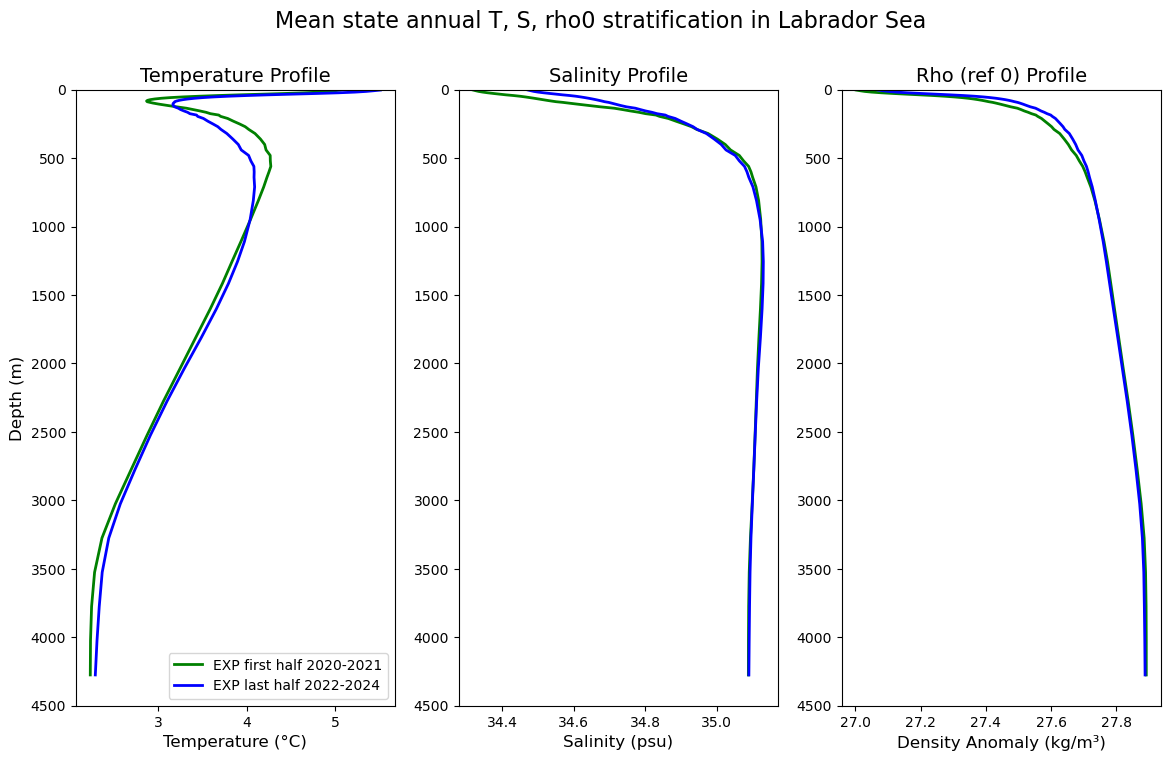

In [6]:
fn.plot_temporal_split(converted_labrador_sea_mean, "Labrador Sea")